# Import Libraries and Databases

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import plotly.express as px

In [2]:
# creating a path
path=r'C:\Users\William\July-2023 Airbnb Amsterdam'

In [3]:
# importing data
df_listings_dets=pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'df_listings_dets_number_only.csv'), index_col = False)

In [4]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
# checking head and space
df_listings_dets.head()

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,2818,52.365755,4.941419,2,2.0,1.0,2.0,59,100.0,50.0,...,248,97.0,10.0,10.0,10.0,10.0,9.0,10.0,1,2.0
1,3209,52.390225,4.873924,5,1.0,2.0,2.0,160,300.0,40.0,...,42,96.0,10.0,9.0,10.0,10.0,9.0,9.0,1,1.0
2,20168,52.365087,4.893541,2,1.0,1.0,1.0,80,NaN,NaN,...,233,87.0,9.0,10.0,9.0,9.0,10.0,9.0,2,2.0
3,25428,52.373114,4.883668,3,1.0,1.0,1.0,125,300.0,40.0,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2,0.0
4,27886,52.386727,4.892078,2,1.0,1.0,1.0,150,0.0,0.0,...,171,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.0


In [6]:
df_listings_dets.shape

(20013, 28)

In [7]:
# Checking for NaN's
df_listings_dets.isnull().sum()

id                                   0
latitude                             0
longitude                            0
accommodates                         0
bathrooms                            9
bedrooms                             8
beds                                 7
price                                0
security_deposit                  6156
cleaning_fee                      3625
guests_included                      0
extra_people                         0
minimum_nights                       0
maximum_nights                       0
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
number_of_reviews                    0
review_scores_rating              2638
review_scores_accuracy            2648
review_scores_cleanliness         2646
review_scores_checkin             2660
review_scores_communication       2651
review_scores_location            2659
review_scores_value      

In [8]:
# Removing NaN's
df_listings_no_nan = df_listings_dets.dropna()

In [9]:
# Checking to make sure they're removed
df_listings_no_nan.isnull().sum()

id                                0
latitude                          0
longitude                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
price                             0
security_deposit                  0
cleaning_fee                      0
guests_included                   0
extra_people                      0
minimum_nights                    0
maximum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
calculated_host_listings_count    0
reviews_per_month           

In [10]:
df_listings_no_nan.shape

(11939, 28)

In [11]:
df_listings_no_nan.head(5)

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,2818,52.365755,4.941419,2,2.0,1.0,2.0,59,100.0,50.0,...,248,97.0,10.0,10.0,10.0,10.0,9.0,10.0,1,2.0
1,3209,52.390225,4.873924,5,1.0,2.0,2.0,160,300.0,40.0,...,42,96.0,10.0,9.0,10.0,10.0,9.0,9.0,1,1.0
3,25428,52.373114,4.883668,3,1.0,1.0,1.0,125,300.0,40.0,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2,0.0
4,27886,52.386727,4.892078,2,1.0,1.0,1.0,150,0.0,0.0,...,171,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.0
5,28658,52.375342,4.857289,2,1.0,1.0,2.0,65,150.0,15.0,...,434,93.0,9.0,10.0,10.0,9.0,9.0,9.0,2,4.0


In [12]:
print(df_listings_no_nan)

             id   latitude  longitude  accommodates  bathrooms  bedrooms  \
0          2818  52.365755   4.941419             2        2.0       1.0   
1          3209  52.390225   4.873924             5        1.0       2.0   
3         25428  52.373114   4.883668             3        1.0       1.0   
4         27886  52.386727   4.892078             2        1.0       1.0   
5         28658  52.375342   4.857289             2        1.0       1.0   
...         ...        ...        ...           ...        ...       ...   
19688  30220744  52.354115   4.883773             2        1.0       1.0   
19703  30244717  52.330783   4.803694             2        1.0       0.0   
19712  30250660  52.370224   4.874619             4        1.0       2.0   
19777  30342336  52.376726   4.892799             2        1.0       1.0   
19958  30525429  52.373962   4.899847             4        2.0       2.0   

       beds  price  security_deposit  cleaning_fee  ...  number_of_reviews  \
0       2

In [13]:
df_listings_no_nan

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,2818,52.365755,4.941419,2,2.0,1.0,2.0,59,100.0,50.0,...,248,97.0,10.0,10.0,10.0,10.0,9.0,10.0,1,2.0
1,3209,52.390225,4.873924,5,1.0,2.0,2.0,160,300.0,40.0,...,42,96.0,10.0,9.0,10.0,10.0,9.0,9.0,1,1.0
3,25428,52.373114,4.883668,3,1.0,1.0,1.0,125,300.0,40.0,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2,0.0
4,27886,52.386727,4.892078,2,1.0,1.0,1.0,150,0.0,0.0,...,171,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.0
5,28658,52.375342,4.857289,2,1.0,1.0,2.0,65,150.0,15.0,...,434,93.0,9.0,10.0,10.0,9.0,9.0,9.0,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19688,30220744,52.354115,4.883773,2,1.0,1.0,1.0,130,150.0,50.0,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.0
19703,30244717,52.330783,4.803694,2,1.0,0.0,2.0,75,0.0,35.0,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2,1.0
19712,30250660,52.370224,4.874619,4,1.0,2.0,2.0,160,0.0,30.0,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,3,1.0
19777,30342336,52.376726,4.892799,2,1.0,1.0,1.0,55,0.0,40.0,...,1,80.0,8.0,4.0,8.0,10.0,10.0,10.0,12,1.0


In [14]:
df_listings_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11939 entries, 0 to 19958
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11939 non-null  int64  
 1   latitude                        11939 non-null  float64
 2   longitude                       11939 non-null  float64
 3   accommodates                    11939 non-null  int64  
 4   bathrooms                       11939 non-null  float64
 5   bedrooms                        11939 non-null  float64
 6   beds                            11939 non-null  float64
 7   price                           11939 non-null  int64  
 8   security_deposit                11939 non-null  float64
 9   cleaning_fee                    11939 non-null  float64
 10  guests_included                 11939 non-null  int64  
 11  extra_people                    11939 non-null  int64  
 12  minimum_nights                  

# Standardizing the Data

In [15]:
#standardize the values in each column
df_new = (df_listings_no_nan-df_listings_no_nan.mean())/df_listings_no_nan.std()

In [16]:
df_new

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,-1.831513,0.013876,1.523463,-0.732904,0.747860,-0.542337,0.052301,-0.631033,-0.359591,0.436838,...,5.271365,0.334955,0.478117,0.626919,0.432914,0.371401,-0.596364,1.060083,-0.175102,0.674537
1,-1.831466,1.596014,-0.428641,1.522287,-0.217823,0.569627,0.052301,0.027815,0.272386,0.000398,...,0.424898,0.182431,0.478117,-0.570072,0.432914,0.371401,-0.596364,-0.192275,-0.175102,-0.049160
3,-1.828778,0.489729,-0.146821,0.018826,-0.217823,-0.542337,-0.642274,-0.200499,0.272386,0.000398,...,-0.539690,0.792528,0.478117,0.626919,0.432914,0.371401,0.797254,1.060083,-0.137104,-0.772856
4,-1.828480,1.369869,0.096411,-0.732904,-0.217823,-0.542337,-0.642274,-0.037418,-0.675580,-1.745361,...,3.459822,0.640003,0.478117,0.626919,0.432914,0.371401,0.797254,1.060083,-0.175102,0.674537
5,-1.828387,0.633765,-0.909754,-0.732904,-0.217823,-0.542337,0.052301,-0.591893,-0.201597,-1.090701,...,9.647301,-0.275141,-1.003004,0.626919,0.432914,-1.246314,-0.596364,-0.192275,-0.137104,2.121929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19688,1.824330,-0.738653,-0.143775,-0.732904,-0.217823,-0.542337,-0.642274,-0.167883,-0.201597,0.436838,...,-0.539690,0.792528,0.478117,0.626919,0.432914,0.371401,0.797254,1.060083,-0.175102,-0.049160
19703,1.827231,-2.247174,-2.459837,-0.732904,-0.217823,-1.654301,0.052301,-0.526661,-0.675580,-0.217822,...,-0.539690,0.792528,0.478117,0.626919,0.432914,0.371401,0.797254,1.060083,-0.137104,-0.049160
19712,1.827950,0.302839,-0.408557,0.770557,-0.217823,0.569627,0.052301,0.027815,-0.675580,-0.436042,...,-0.539690,0.792528,0.478117,0.626919,0.432914,0.371401,0.797254,1.060083,-0.099106,-0.049160
19777,1.839041,0.723241,0.117276,-0.732904,-0.217823,-0.542337,-0.642274,-0.657126,-0.675580,0.000398,...,-0.539690,-2.257955,-2.484125,-6.555024,-2.550380,0.371401,0.797254,1.060083,0.242877,-0.049160


# The Elbow Technique

In [17]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
score = [kmeans[i].fit(df_new).score(df_new) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\William\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\William\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\William\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\William\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\William\anaconda3\lib\site-packages\skl

[-334264.00000000023,
 -299123.4283129822,
 -274986.18189760443,
 -256804.82940636465,
 -247566.43748458743,
 -239439.56514433236,
 -230283.97727026913,
 -221300.2315765231,
 -212849.9579947909]

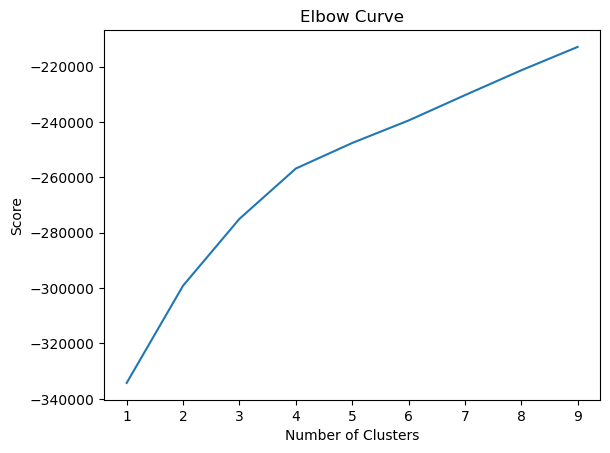

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### After 3, the line begins to straighten out.

# K-means Clustering

In [20]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [21]:
# Fit the k-means object to the data.

kmeans.fit(df_new)

C:\Users\William\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [22]:
df_new['clusters'] = kmeans.fit_predict(df_new)

C:\Users\William\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
df_new

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,clusters
0,-1.831513,0.013876,1.523463,-0.732904,0.747860,-0.542337,0.052301,-0.631033,-0.359591,0.436838,...,0.334955,0.478117,0.626919,0.432914,0.371401,-0.596364,1.060083,-0.175102,0.674537,1
1,-1.831466,1.596014,-0.428641,1.522287,-0.217823,0.569627,0.052301,0.027815,0.272386,0.000398,...,0.182431,0.478117,-0.570072,0.432914,0.371401,-0.596364,-0.192275,-0.175102,-0.049160,2
3,-1.828778,0.489729,-0.146821,0.018826,-0.217823,-0.542337,-0.642274,-0.200499,0.272386,0.000398,...,0.792528,0.478117,0.626919,0.432914,0.371401,0.797254,1.060083,-0.137104,-0.772856,2
4,-1.828480,1.369869,0.096411,-0.732904,-0.217823,-0.542337,-0.642274,-0.037418,-0.675580,-1.745361,...,0.640003,0.478117,0.626919,0.432914,0.371401,0.797254,1.060083,-0.175102,0.674537,1
5,-1.828387,0.633765,-0.909754,-0.732904,-0.217823,-0.542337,0.052301,-0.591893,-0.201597,-1.090701,...,-0.275141,-1.003004,0.626919,0.432914,-1.246314,-0.596364,-0.192275,-0.137104,2.121929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19688,1.824330,-0.738653,-0.143775,-0.732904,-0.217823,-0.542337,-0.642274,-0.167883,-0.201597,0.436838,...,0.792528,0.478117,0.626919,0.432914,0.371401,0.797254,1.060083,-0.175102,-0.049160,2
19703,1.827231,-2.247174,-2.459837,-0.732904,-0.217823,-1.654301,0.052301,-0.526661,-0.675580,-0.217822,...,0.792528,0.478117,0.626919,0.432914,0.371401,0.797254,1.060083,-0.137104,-0.049160,1
19712,1.827950,0.302839,-0.408557,0.770557,-0.217823,0.569627,0.052301,0.027815,-0.675580,-0.436042,...,0.792528,0.478117,0.626919,0.432914,0.371401,0.797254,1.060083,-0.099106,-0.049160,1
19777,1.839041,0.723241,0.117276,-0.732904,-0.217823,-0.542337,-0.642274,-0.657126,-0.675580,0.000398,...,-2.257955,-2.484125,-6.555024,-2.550380,0.371401,0.797254,1.060083,0.242877,-0.049160,0


In [24]:
df_new['clusters'].value_counts()

2    8017
1    2784
0    1138
Name: clusters, dtype: int64

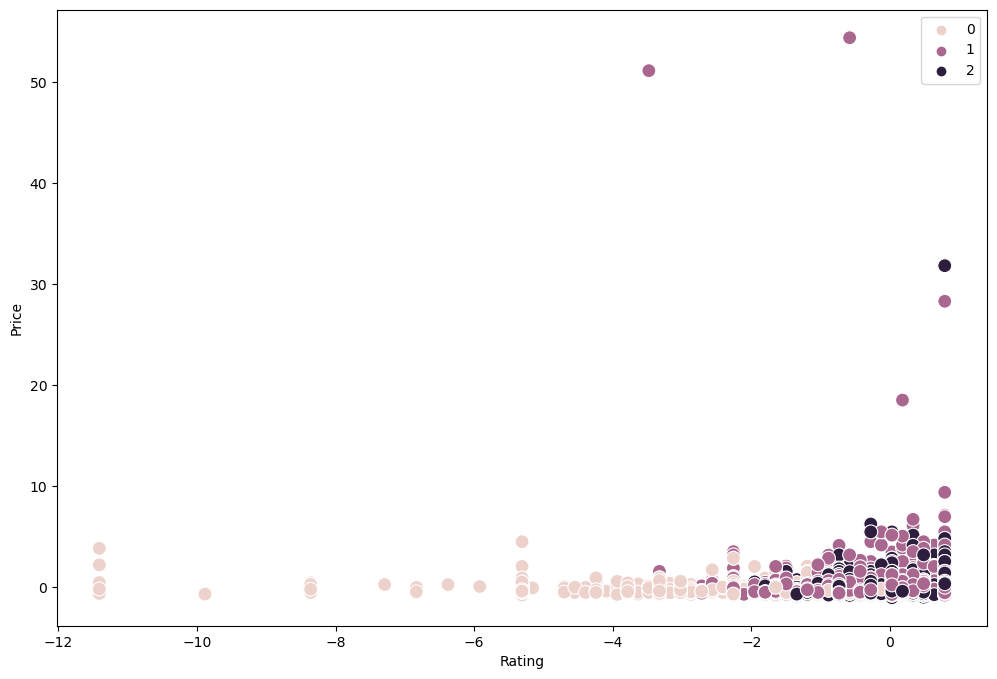

In [25]:
# Plot the clusters for the "review_scores_rating" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['review_scores_rating'], y=df_new['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Rating') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

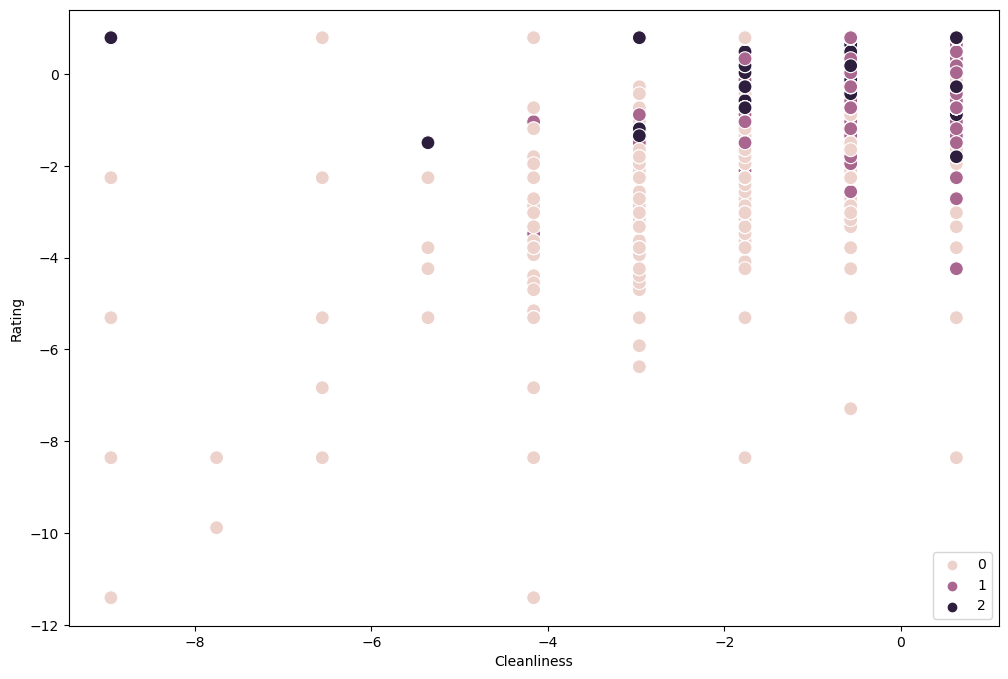

In [26]:
# Plot the clusters for the "review_scores_cleanliness" and "review_scores_rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['review_scores_cleanliness'], y=df_new['review_scores_rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Cleanliness') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

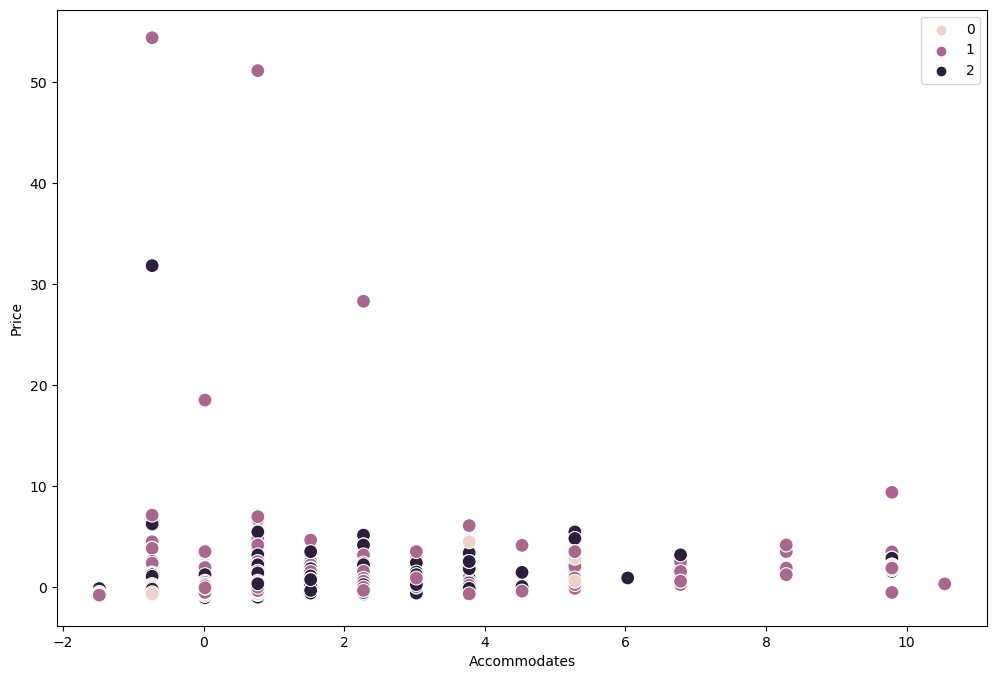

In [27]:
# Plot the clusters for the "accommodates" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['accommodates'], y=df_new['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Accommodates') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

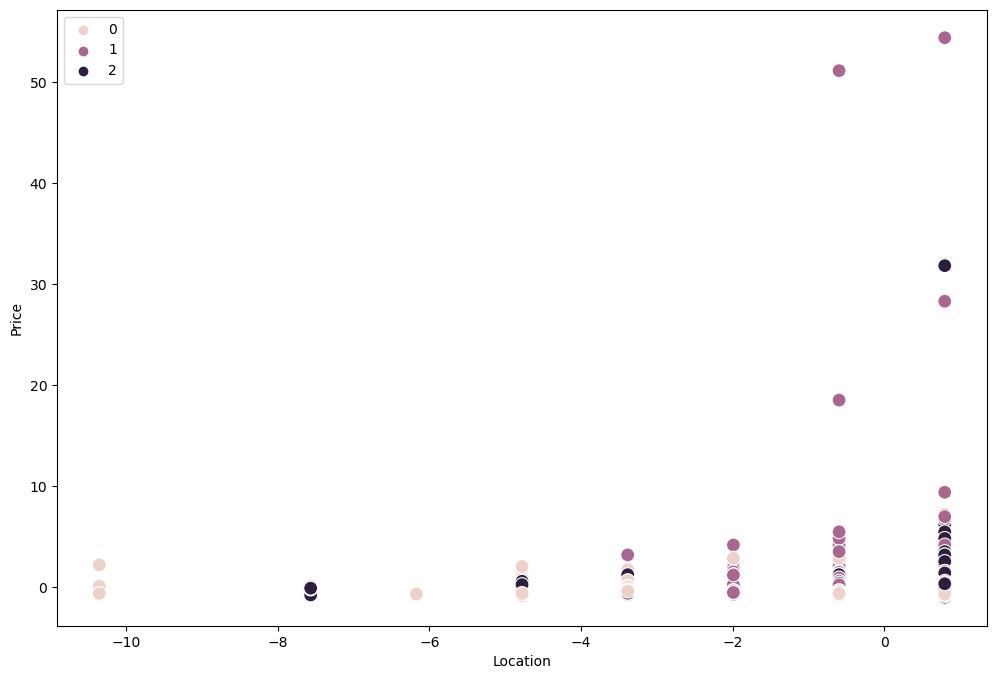

In [28]:
# Plot the clusters for the "review_scores_location" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['review_scores_location'], y=df_new['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Location') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

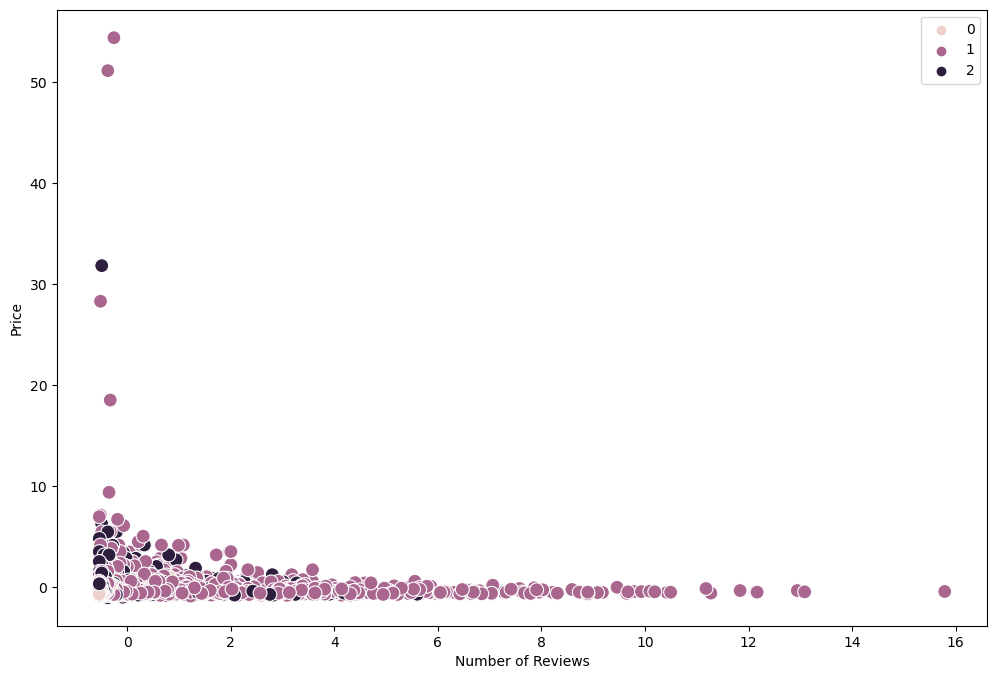

In [31]:
# Plot the clusters for the "number_of_reviews" and "price" variables.

viz_price_reviews=plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['number_of_reviews'], y=df_new['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Reviews') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

In [32]:
# Exporting Visuals
viz_price_reviews.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_price_reviews.png'))

#### The plots are not proving to be useful. I believe this has to do with my difficulty in standardizing the data.

In [67]:
df_new.loc[df_new['clusters'] == 2, 'cluster'] = 'dark purple'
df_new.loc[df_new['clusters'] == 1, 'cluster'] = 'purple'
df_new.loc[df_new['clusters'] == 0, 'cluster'] = 'pink'

In [68]:
df_new.groupby('cluster').agg({'price':['mean', 'median'], 
                         'review_scores_rating':['mean', 'median'], 
                         'review_scores_location':['mean', 'median'],
                          'review_scores_cleanliness':['mean', 'median']})

price           review_scores_rating            \
                 mean    median                 mean    median   
cluster                                                          
dark purple -0.036243 -0.167883             0.268704  0.487479   
pink        -0.123349 -0.233115            -1.866995 -1.647858   
purple       0.158070 -0.102650             0.055511  0.182431   

            review_scores_location           review_scores_cleanliness  \
                              mean    median                      mean   
cluster                                                                  
dark purple               0.090262  0.797254                  0.195049   
pink                     -0.908080 -0.596364                 -1.555024   
purple                    0.142615  0.797254                  0.128460   

                       
               median  
cluster                
dark purple  0.626919  
pink        -1.767062  
purple       0.626919

#### Being able to split data into different sections allows the analyst to look at the data in different ways, bringing to light certain connections that may not have been possible to make previously.